In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pandas as pd

In [ ]:
# Генерация синтетических данных
# np.random.seed(42)
# X = np.random.normal(0, 1, (100, 2))
# X = np.concatenate([X, np.random.normal(5, 1, (5, 2))])  # Добавление аномалий


In [31]:
col = 'AZ_25'

In [32]:
project_data = pd.read_csv('results.csv')
project_data[col] = pd.to_numeric(project_data[col], errors='coerce')
project_data = project_data[["timestamp", col]]
project_data.head()

,timestamp,AZ_25
0,2023-01-30 10:09:00,762.467096
1,2023-01-30 10:10:00,723.815598
2,2023-01-30 10:11:00,739.284609
3,2023-01-30 10:12:00,692.032188
4,2023-01-30 10:13:00,811.692127


In [33]:
from datetime import datetime

# Две строки с датами
date1_str = project_data['timestamp'][0]
for i in range(project_data.shape[0]):
    date2_str = project_data['timestamp'].iloc[i]

    # Преобразование строк в datetime объекты
    date1 = datetime.strptime(date1_str, "%Y-%m-%d %H:%M:%S")
    date2 = datetime.strptime(date2_str, "%Y-%m-%d %H:%M:%S")

    # Перевод в UNIX-время (в секундах с 1 января 1970 года)
    timestamp1 = int(date1.timestamp())
    timestamp2 = int(date2.timestamp())

    # Разница во времени в секундах
    difference_in_seconds = timestamp2 - timestamp1
    project_data['timestamp'][i] = difference_in_seconds

# df['timestamp'].head()
# Вывод результата
print(f"Timestamp 1: {timestamp1} секунд {date1_str}")
print(f"Timestamp 2: {timestamp2} секунд{date2_str}")
print(f"Разница: {difference_in_seconds} секунд")

Timestamp 1: 1675062540 секунд 2023-01-30 10:09:00
Timestamp 2: 1686826200 секунд2023-06-15 13:50:00
Разница: 11763660 секунд


/tmp/ipykernel_2554702/2278467375.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_data['timestamp'][i] = difference_in_seconds


In [34]:
a = project_data['timestamp'].tolist()
b = project_data[col].tolist()

data = {'timestamp': a, 'value': b}
df = pd.DataFrame(data)
X = np.column_stack((a,b))


In [35]:
for data in X:
    if np.any(np.isnan(data)):
        data[1] = 0

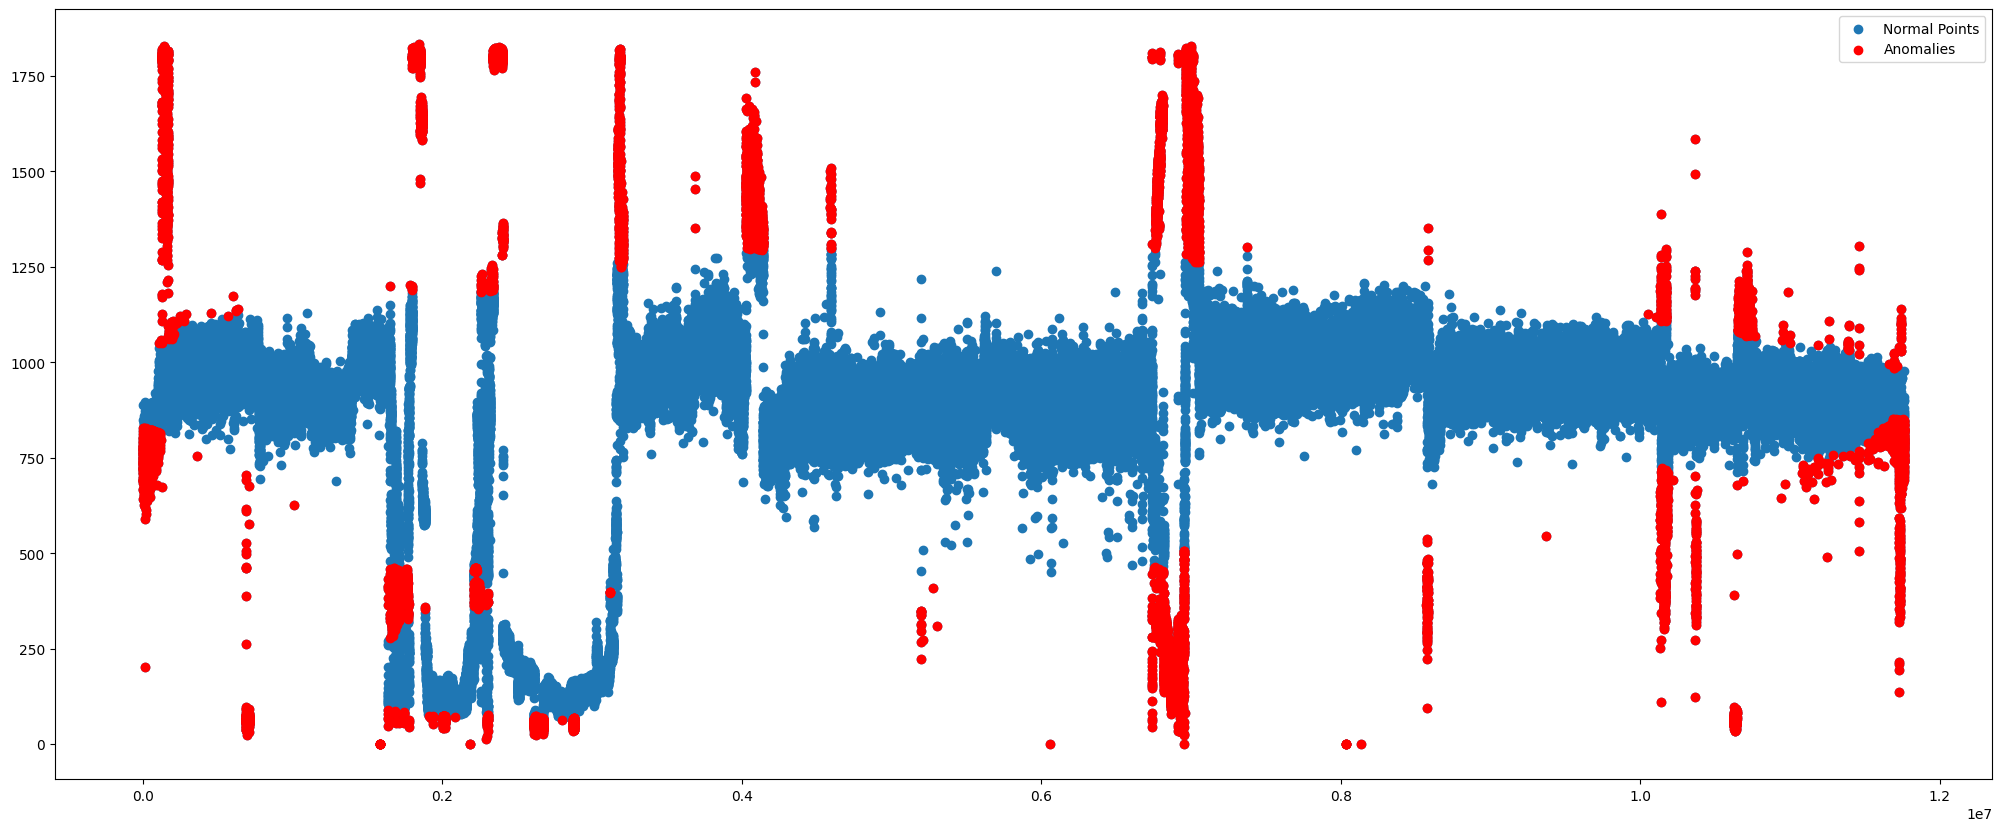

In [39]:




# Обучение Isolation Forest
clf = IsolationForest(contamination=0.08)
clf.fit(X)

# Предсказание аномалий
y_pred = clf.predict(X)
anomalies = X[y_pred == -1]

# Визуализация результатов
plt.figure(figsize=(25,10))
plt.scatter(X[:, 0], X[:, 1], label='Normal Points')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', label='Anomalies')
plt.legend()
plt.show()
